In [55]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [56]:
from sympy import init_printing
init_printing()

In [57]:
x = sympy.symbols('x')

In [58]:
x

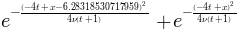

In [59]:
x, nu, t = sympy.symbols('x nu t')
phi = sympy.exp(-(x-4*t)**2/(4*nu*(t+1))) + \
sympy.exp(-(x-4*t-2*numpy.pi)**2/(4*nu*(t+1)))
phi

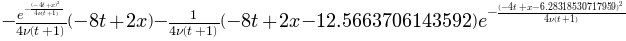

In [60]:
phiprime = phi.diff(x)
phiprime

In [61]:
print(phiprime)

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))


In [62]:
from sympy.utilities.lambdify import lambdify

u = -2*nu*(phiprime/phi)+4
print(u)

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


In [63]:
u_lamb = lambdify((t, x, nu), u)
print("The value of u at t=2, x=5, nu=4 is {}.".format(u_lamb(2,5,4)))

The value of u at t=2, x=5, nu=4 is 2.6504764253114956.


In [64]:
###variable declarations
nx = 101
nt = 100
dx = 2*numpy.pi/(nx-1)
nu = .07
sigma = .1
dt = sigma*dx**2/nu 

x = numpy.linspace(0, 2*numpy.pi, nx)
un = numpy.empty(nx)
t = 0

In [71]:
print(x)
print(un)

[ 0.          0.06283185  0.12566371  0.18849556  0.25132741  0.31415927
  0.37699112  0.43982297  0.50265482  0.56548668  0.62831853  0.69115038
  0.75398224  0.81681409  0.87964594  0.9424778   1.00530965  1.0681415
  1.13097336  1.19380521  1.25663706  1.31946891  1.38230077  1.44513262
  1.50796447  1.57079633  1.63362818  1.69646003  1.75929189  1.82212374
  1.88495559  1.94778745  2.0106193   2.07345115  2.136283    2.19911486
  2.26194671  2.32477856  2.38761042  2.45044227  2.51327412  2.57610598
  2.63893783  2.70176968  2.76460154  2.82743339  2.89026524  2.95309709
  3.01592895  3.0787608   3.14159265  3.20442451  3.26725636  3.33008821
  3.39292007  3.45575192  3.51858377  3.58141563  3.64424748  3.70707933
  3.76991118  3.83274304  3.89557489  3.95840674  4.0212386   4.08407045
  4.1469023   4.20973416  4.27256601  4.33539786  4.39822972  4.46106157
  4.52389342  4.58672527  4.64955713  4.71238898  4.77522083  4.83805269
  4.90088454  4.96371639  5.02654825  5.0893801   5.

In [65]:
u = numpy.asarray([u_lamb(t, x0, nu) for x0 in x])
u

array([ 4.        ,  4.06283185,  4.12566371,  4.18849556,  4.25132741,
        4.31415927,  4.37699112,  4.43982297,  4.50265482,  4.56548668,
        4.62831853,  4.69115038,  4.75398224,  4.81681409,  4.87964594,
        4.9424778 ,  5.00530965,  5.0681415 ,  5.13097336,  5.19380521,
        5.25663706,  5.31946891,  5.38230077,  5.44513262,  5.50796447,
        5.57079633,  5.63362818,  5.69646003,  5.75929189,  5.82212374,
        5.88495559,  5.94778745,  6.0106193 ,  6.07345115,  6.136283  ,
        6.19911486,  6.26194671,  6.32477856,  6.38761042,  6.45044227,
        6.51327412,  6.57610598,  6.63893783,  6.70176967,  6.76460125,
        6.82742866,  6.89018589,  6.95176632,  6.99367964,  6.72527549,
        4.        ,  1.27472451,  1.00632036,  1.04823368,  1.10981411,
        1.17257134,  1.23539875,  1.29823033,  1.36106217,  1.42389402,
        1.48672588,  1.54955773,  1.61238958,  1.67522144,  1.73805329,
        1.80088514,  1.863717  ,  1.92654885,  1.9893807 ,  2.05

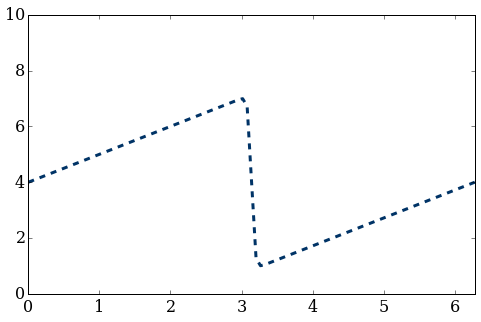

In [66]:
pyplot.figure(figsize=(8,5), dpi=100)
pyplot.plot(x,u, color='#003366', ls='--', lw=3)
pyplot.xlim([0,2*numpy.pi])
pyplot.ylim([0,10]);

In [67]:
for n in range(nt):
    un = u.copy()
    
    u[1:-1] = un[1:-1] - un[1:-1] * dt/dx * (un[1:-1] - un[:-2]) + nu*dt/dx**2*\
                    (un[2:] - 2*un[1:-1] + un[:-2])

    u[0] = un[0] - un[0] * dt/dx * (un[0] - un[-1]) + nu*dt/dx**2*\
                (un[1] - 2*un[0] + un[-1])
    u[-1] = un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) + nu*dt/dx**2*\
                (un[0]- 2*un[-1] + un[-2])
        
    u_analytical = numpy.asarray([u_lamb(nt*dt, xi, nu) for xi in x])

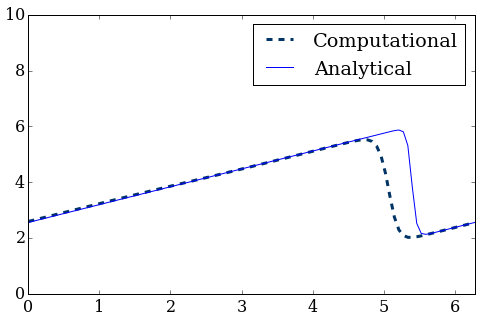

In [68]:
pyplot.figure(figsize=(8,5), dpi=100)
pyplot.plot(x,u, color='#003366', ls='--', lw=3, label='Computational')
pyplot.plot(x, u_analytical, label='Analytical')
pyplot.xlim([0,2*numpy.pi])
pyplot.ylim([0,10])
pyplot.legend();

In [69]:
from JSAnimation.IPython_display import display_animation
from matplotlib import animation

ImportError: No module named 'JSAnimation'

In [ ]:
u = numpy.asarray([u_lamb(t, x0, nu) for x0 in x])

In [ ]:
fig = pyplot.figure(figsize=(8,6))
ax = pyplot.axes(xlim=(0,2*numpy.pi), ylim=(0,10))
line = ax.plot([], [], color='#003366', ls='--', lw=3)[0]
line2 = ax.plot([], [], 'k-', lw=2)[0]
ax.legend(['Computed','Analytical'])

def burgers(n):
       
    un = u.copy()
        
    u[1:-1] = un[1:-1] - un[1:-1] * dt/dx * (un[1:-1] - un[:-2]) + nu*dt/dx**2*\
                    (un[2:] - 2*un[1:-1] + un[:-2])

    u[0] = un[0] - un[0] * dt/dx * (un[0] - un[-1]) + nu*dt/dx**2*\
                (un[1] - 2*un[0] + un[-1])
    u[-1] = un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) + nu*dt/dx**2*\
                (un[0]- 2*un[-1] + un[-2])
        
    u_analytical = numpy.asarray([u_lamb(n*dt, xi, nu) for xi in x])
    line.set_data(x,u)
    line2.set_data(x, u_analytical)
    

animation.FuncAnimation(fig, burgers,
                        frames=nt, interval=100)

In [ ]:
%%timeit

u = numpy.asarray([u_lamb(t, x0, nu) for x0 in x])

for n in range(nt):
    un = u.copy()
    
    for i in range(nx-1):
        u[i] = un[i] - un[i] * dt/dx *(un[i] - un[i-1]) + nu*dt/dx**2*\
                (un[i+1]-2*un[i]+un[i-1])
    
    u[-1] = un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) + nu*dt/dx**2*\
                (un[0]- 2*un[-1] + un[-2])

In [ ]:
%%timeit

u = numpy.asarray([u_lamb(t, x0, nu) for x0 in x])

for n in range(nt):
    un = u.copy()
    
    u[1:-1] = un[1:-1] - un[1:-1] * dt/dx * (un[1:-1] - un[:-2]) + nu*dt/dx**2*\
                    (un[2:] - 2*un[1:-1] + un[:-2])

    u[0] = un[0] - un[0] * dt/dx * (un[0] - un[-1]) + nu*dt/dx**2*\
                (un[1] - 2*un[0] + un[-1])
    u[-1] = un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) + nu*dt/dx**2*\
                (un[0]- 2*un[-1] + un[-2])